In [472]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from sklearn.preprocessing import LabelEncoder

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
    
    
    
    

In [473]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [474]:
labels = train_df['Survived']
#labels
#labels = pd.Series(labels)
labels

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64

In [475]:
#train_df=train_df.drop(['Survived'], axis=1)
#train_df


In [476]:
combine = pd.concat([train_df.drop(['Survived'], axis=1), test_df])
combine

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [477]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [478]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [479]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [480]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [481]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


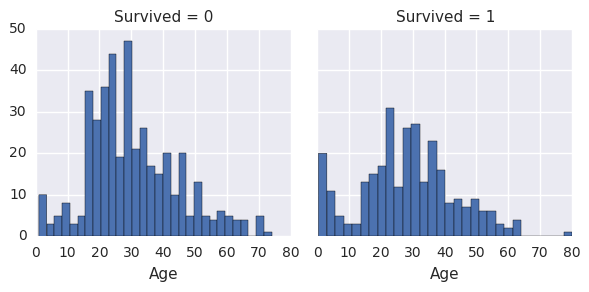

In [482]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=30)

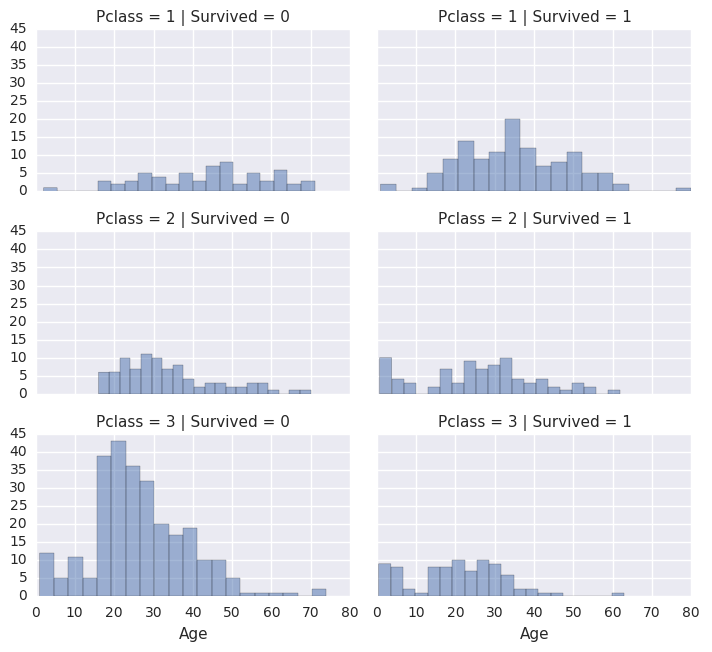

In [483]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

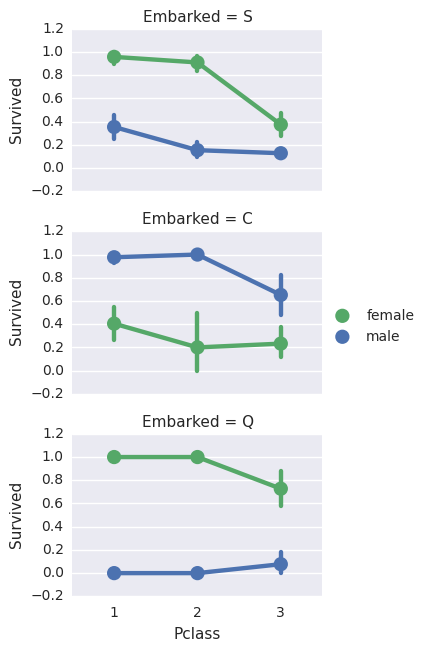

In [484]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived',  'Sex',palette='deep')
grid.add_legend()

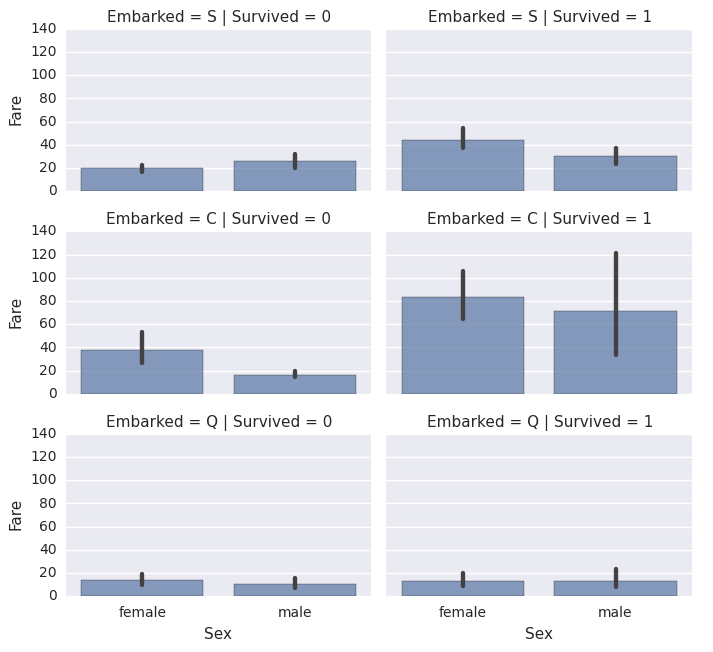

In [485]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.7)\
#, ci=None
grid.add_legend()

In [486]:
combine.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
388        Mr
389    Master
390        Mr
391       Mrs
392    Master
393        Mr
394        Mr
395       Mrs
396        Mr
397       Mrs
398        Mr
399        Mr
400      Miss
401        Mr
402      Miss
403        Mr
404        Mr
405        Mr
406        Mr
407        Mr
408      Miss
409      Miss
410      Miss
411       Mrs
412      Miss
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Name, dtype: object

In [487]:
combine['Title'] = combine.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
combine['Title']
#pd.crosstab(combine['Title'], combine['Sex'])


0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
388        Mr
389    Master
390        Mr
391       Mrs
392    Master
393        Mr
394        Mr
395       Mrs
396        Mr
397       Mrs
398        Mr
399        Mr
400      Miss
401        Mr
402      Miss
403        Mr
404        Mr
405        Mr
406        Mr
407        Mr
408      Miss
409      Miss
410      Miss
411       Mrs
412      Miss
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, dtype: object

In [488]:
combine['Title'] = combine['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace('Mlle', 'Miss')
combine['Title'] = combine['Title'].replace('Ms', 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')
combine

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [489]:
#train_new = pd.DataFrame()
train_df['Title'] = combine[0:len(train_df.as_matrix())]['Title']
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [490]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [491]:
le = LabelEncoder()
combine['Sex']=le.fit_transform(combine['Sex'])
combine['Sex']



0      1
1      0
2      0
3      0
4      1
5      1
6      1
7      1
8      0
9      0
10     0
11     0
12     1
13     1
14     0
15     0
16     1
17     1
18     0
19     0
20     1
21     1
22     0
23     1
24     0
25     0
26     1
27     1
28     0
29     1
      ..
388    1
389    1
390    1
391    0
392    1
393    1
394    1
395    0
396    1
397    0
398    1
399    1
400    0
401    1
402    0
403    1
404    1
405    1
406    1
407    1
408    0
409    0
410    0
411    0
412    0
413    1
414    0
415    1
416    1
417    1
Name: Sex, dtype: int64

In [492]:
combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,1
5,6,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q,Mr,1
6,7,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,Mr,1
7,8,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,Master,5
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,Mrs,3
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,Mrs,2


In [493]:
combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1
combine

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1
5,6,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q,Mr,1,1
6,7,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,Mr,1,1
7,8,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,Master,5,0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,Mrs,3,0
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,Mrs,2,0


In [494]:
train_df= combine[0:len(train_df.as_matrix())]

train_df

test_df= combine[len(train_df.as_matrix()):]

test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,Mr,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,0
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,NaN,S,Mr,1,1
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,NaN,Q,Miss,1,1
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,NaN,S,Mr,3,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,NaN,C,Mrs,1,1
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,NaN,S,Mr,3,0


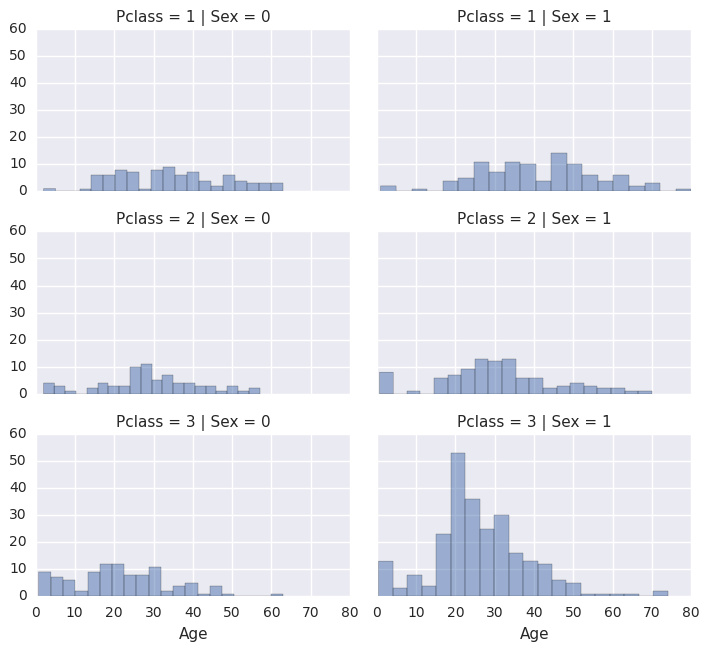

In [495]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [496]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [497]:
for i in range(0, 2):
    for j in range(0, 3):
        guess_df = train_df[(train_df['Sex'] == i) & (train_df['Pclass'] == j+1)]['Age'].dropna()

        # age_mean = guess_df.mean()
        # age_std = guess_df.std()
        # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
        age_guess = guess_df.median()

        # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
        
guess_ages

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

In [498]:
for i in range(0, 2):
    for j in range(0, 3):
        train_df.loc[(train_df['Age'].isnull()) & (train_df['Sex'] == i) & (train_df['Pclass'] == j+1),'Age'] = guess_ages[i,j]
        test_df.loc[(test_df['Age'].isnull()) & (test_df['Sex'] == i) & (test_df['Pclass'] == j+1),'Age'] = guess_ages[i,j]
        
train_df['Age'] = train_df['Age'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)



/Library/Python/2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Python/2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [499]:
train_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C,Mrs,2,0
2,3,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,S,Mrs,2,0
4,5,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,S,Mr,1,1
5,6,3,"Moran, Mr. James",1,25,0,0,330877,8.4583,NaN,Q,Mr,1,1
6,7,1,"McCarthy, Mr. Timothy J",1,54,0,0,17463,51.8625,E46,S,Mr,1,1
7,8,3,"Palsson, Master. Gosta Leonard",1,2,3,1,349909,21.0750,NaN,S,Master,5,0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27,0,2,347742,11.1333,NaN,S,Mrs,3,0
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14,1,0,237736,30.0708,NaN,C,Mrs,2,0


In [500]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",1,34,0,0,330911,7.8292,NaN,Q,Mr,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47,1,0,363272,7.0000,NaN,S,Mrs,2,0
2,894,2,"Myles, Mr. Thomas Francis",1,62,0,0,240276,9.6875,NaN,Q,Mr,1,1
3,895,3,"Wirz, Mr. Albert",1,27,0,0,315154,8.6625,NaN,S,Mr,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22,1,1,3101298,12.2875,NaN,S,Mrs,3,0
5,897,3,"Svensson, Mr. Johan Cervin",1,14,0,0,7538,9.2250,NaN,S,Mr,1,1
6,898,3,"Connolly, Miss. Kate",0,30,0,0,330972,7.6292,NaN,Q,Miss,1,1
7,899,2,"Caldwell, Mr. Albert Francis",1,26,1,1,248738,29.0000,NaN,S,Mr,3,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18,0,0,2657,7.2292,NaN,C,Mrs,1,1
9,901,3,"Davies, Mr. John Samuel",1,21,2,0,A/4 48871,24.1500,NaN,S,Mr,3,0


In [501]:
combine

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1
5,6,3,"Moran, Mr. James",1,25.0,0,0,330877,8.4583,NaN,Q,Mr,1,1
6,7,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,Mr,1,1
7,8,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,Master,5,0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,Mrs,3,0
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,Mrs,2,0


In [502]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df['Survived'] = labels
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Python/2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,AgeBand,Survived
0,"(-0.08, 16]",0.550000
1,"(16, 32]",0.337374
2,"(32, 48]",0.412037
3,"(48, 64]",0.434783
4,"(64, 80]",0.090909


In [503]:
combine.loc[ combine['Age'] <= 16, 'AgeRange'] = 0
combine.loc[(combine['Age'] > 16) & (combine['Age'] <= 32), 'AgeRange'] = 1
combine.loc[(combine['Age'] > 32) & (combine['Age'] <= 48), 'AgeRange'] = 2
combine.loc[(combine['Age'] > 48) & (combine['Age'] <= 64), 'AgeRange'] = 3
combine.loc[ combine['Age'] > 64, 'AgeRange']=4

In [504]:
combine

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,AgeRange
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0,2.0
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0,2.0
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1,2.0
5,6,3,"Moran, Mr. James",1,25.0,0,0,330877,8.4583,NaN,Q,Mr,1,1,1.0
6,7,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,Mr,1,1,3.0
7,8,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,Master,5,0,0.0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,Mrs,3,0,1.0
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,Mrs,2,0,0.0


In [505]:
#combine['Age'].fillna(train_df['Age'].mean(), inplace=True)
combine['Fare'].fillna(train_df['Fare'].mean(), inplace=True)

In [506]:
combine['Age*Class'] = combine.Age * combine.Pclass
combine

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,AgeRange,Age*Class
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0,1.0,66.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0,2.0,38.0
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1.0,78.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0,2.0,35.0
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1,2.0,105.0
5,6,3,"Moran, Mr. James",1,25.0,0,0,330877,8.4583,NaN,Q,Mr,1,1,1.0,75.0
6,7,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,Mr,1,1,3.0,54.0
7,8,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,Master,5,0,0.0,6.0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,Mrs,3,0,1.0,81.0
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,Mrs,2,0,0.0,28.0


In [507]:
combine['Fare*Class'] = combine.Fare * combine.Pclass
combine

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,AgeRange,Age*Class,Fare*Class
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0,1.0,66.0,21.7500
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0,2.0,38.0,71.2833
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1.0,78.0,23.7750
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0,2.0,35.0,53.1000
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1,2.0,105.0,24.1500
5,6,3,"Moran, Mr. James",1,25.0,0,0,330877,8.4583,NaN,Q,Mr,1,1,1.0,75.0,25.3749
6,7,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,Mr,1,1,3.0,54.0,51.8625
7,8,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,Master,5,0,0.0,6.0,63.2250
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,Mrs,3,0,1.0,81.0,33.3999
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,Mrs,2,0,0.0,28.0,60.1416


In [508]:
freq_port = train_df.Embarked.dropna().mode()[0]
combine['Embarked'] = combine['Embarked'].fillna(freq_port)
combine

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,AgeRange,Age*Class,Fare*Class
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0,1.0,66.0,21.7500
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0,2.0,38.0,71.2833
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1.0,78.0,23.7750
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0,2.0,35.0,53.1000
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1,2.0,105.0,24.1500
5,6,3,"Moran, Mr. James",1,25.0,0,0,330877,8.4583,NaN,Q,Mr,1,1,1.0,75.0,25.3749
6,7,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,Mr,1,1,3.0,54.0,51.8625
7,8,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,Master,5,0,0.0,6.0,63.2250
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,Mrs,3,0,1.0,81.0,33.3999
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,Mrs,2,0,0.0,28.0,60.1416


In [509]:
combine.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,AgeRange,Age*Class,Fare*Class
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,0.644003,29.190733,0.498854,0.385027,33.294646,1.883881,0.603514,1.324675,62.035080,52.215911
std,378.020061,0.837836,0.478997,13.190152,1.041658,0.865560,51.738888,1.583639,0.489354,0.803763,29.926443,52.951497
min,1.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.510000,0.000000
25%,328.000000,2.000000,0.000000,21.500000,0.000000,0.000000,7.895800,1.000000,0.000000,1.000000,42.000000,23.637600
50%,655.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,1.000000,1.000000,1.000000,62.000000,28.500000
75%,982.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.275000,2.000000,1.000000,2.000000,75.000000,59.400000
max,1309.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,11.000000,1.000000,4.000000,222.000000,512.329200


In [510]:
combine.describe(include=['O'])

,Name,Ticket,Cabin,Embarked,Title
count,1309,1309,295,1309,1309
unique,1307,929,186,3,5
top,"Connolly, Miss. Kate",CA. 2343,C23 C25 C27,S,Mr
freq,2,11,6,916,757


In [511]:
combine['Deck'] = combine.Cabin.str.extract('([A-Z])*', expand=False)
combine

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,AgeRange,Age*Class,Fare*Class,Deck
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0,1.0,66.0,21.7500,NaN
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0,2.0,38.0,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1.0,78.0,23.7750,NaN
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0,2.0,35.0,53.1000,C
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1,2.0,105.0,24.1500,NaN
5,6,3,"Moran, Mr. James",1,25.0,0,0,330877,8.4583,NaN,Q,Mr,1,1,1.0,75.0,25.3749,NaN
6,7,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,Mr,1,1,3.0,54.0,51.8625,E
7,8,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,Master,5,0,0.0,6.0,63.2250,NaN
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,Mrs,3,0,1.0,81.0,33.3999,NaN
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,Mrs,2,0,0.0,28.0,60.1416,NaN


In [512]:
combine.describe(include=['O'])

,Name,Ticket,Cabin,Embarked,Title,Deck
count,1309,1309,295,1309,1309,295
unique,1307,929,186,3,5,8
top,"Connolly, Miss. Kate",CA. 2343,C23 C25 C27,S,Mr,C
freq,2,11,6,916,757,94


In [513]:
combine = combine.drop(['Name','Ticket','Cabin','Deck'], axis=1)
combine

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,AgeRange,Age*Class,Fare*Class
0,1,3,1,22.0,1,0,7.2500,S,Mr,2,0,1.0,66.0,21.7500
1,2,1,0,38.0,1,0,71.2833,C,Mrs,2,0,2.0,38.0,71.2833
2,3,3,0,26.0,0,0,7.9250,S,Miss,1,1,1.0,78.0,23.7750
3,4,1,0,35.0,1,0,53.1000,S,Mrs,2,0,2.0,35.0,53.1000
4,5,3,1,35.0,0,0,8.0500,S,Mr,1,1,2.0,105.0,24.1500
5,6,3,1,25.0,0,0,8.4583,Q,Mr,1,1,1.0,75.0,25.3749
6,7,1,1,54.0,0,0,51.8625,S,Mr,1,1,3.0,54.0,51.8625
7,8,3,1,2.0,3,1,21.0750,S,Master,5,0,0.0,6.0,63.2250
8,9,3,0,27.0,0,2,11.1333,S,Mrs,3,0,1.0,81.0,33.3999
9,10,2,0,14.0,1,0,30.0708,C,Mrs,2,0,0.0,28.0,60.1416


In [514]:
combine.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,AgeRange,Age*Class,Fare*Class
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,0.644003,29.190733,0.498854,0.385027,33.294646,1.883881,0.603514,1.324675,62.035080,52.215911
std,378.020061,0.837836,0.478997,13.190152,1.041658,0.865560,51.738888,1.583639,0.489354,0.803763,29.926443,52.951497
min,1.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.510000,0.000000
25%,328.000000,2.000000,0.000000,21.500000,0.000000,0.000000,7.895800,1.000000,0.000000,1.000000,42.000000,23.637600
50%,655.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,1.000000,1.000000,1.000000,62.000000,28.500000
75%,982.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.275000,2.000000,1.000000,2.000000,75.000000,59.400000
max,1309.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,11.000000,1.000000,4.000000,222.000000,512.329200


In [515]:
#combine.info()

In [516]:
combine.describe(include=['O'])

,Embarked,Title
count,1309,1309
unique,3,5
top,S,Mr
freq,916,757


In [517]:
train_df = combine[0:len(train_df)]
train_df['Survived']= labels
test_df = combine[len(train_df):]

/Library/Python/2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [518]:
train_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,AgeRange,Age*Class,Fare*Class,Survived
0,1,3,1,22.0,1,0,7.2500,S,Mr,2,0,1.0,66.0,21.7500,0
1,2,1,0,38.0,1,0,71.2833,C,Mrs,2,0,2.0,38.0,71.2833,1
2,3,3,0,26.0,0,0,7.9250,S,Miss,1,1,1.0,78.0,23.7750,1
3,4,1,0,35.0,1,0,53.1000,S,Mrs,2,0,2.0,35.0,53.1000,1
4,5,3,1,35.0,0,0,8.0500,S,Mr,1,1,2.0,105.0,24.1500,0
5,6,3,1,25.0,0,0,8.4583,Q,Mr,1,1,1.0,75.0,25.3749,0
6,7,1,1,54.0,0,0,51.8625,S,Mr,1,1,3.0,54.0,51.8625,0
7,8,3,1,2.0,3,1,21.0750,S,Master,5,0,0.0,6.0,63.2250,0
8,9,3,0,27.0,0,2,11.1333,S,Mrs,3,0,1.0,81.0,33.3999,1
9,10,2,0,14.0,1,0,30.0708,C,Mrs,2,0,0.0,28.0,60.1416,1


In [519]:

train_df['FareRange'] = pd.cut(train_df['Fare'], 4)
#train_df[['FareRange', 'Survived']].groupby(['FareRange'], as_index=False).count()

train_df[['FareRange', 'Survived']].groupby(['FareRange'], as_index=False).mean().sort_values(by='FareRange', ascending=True)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,FareRange,Survived
0,"(-0.512, 128.0823]",0.368113
1,"(128.0823, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [520]:
combine.loc[combine['Fare']<=128.0823, 'FareRange'] =0
combine.loc[(combine['Fare']>128.0823) & (combine['Fare'] <=256.165) , 'FareRange'] =1
combine.loc[(combine['Fare']>256.165) & (combine['Fare'] <=384.247) , 'FareRange'] =2
combine.loc[combine['Fare']>384.247, 'FareRange'] = 4
combine

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,AgeRange,Age*Class,Fare*Class,FareRange
0,1,3,1,22.0,1,0,7.2500,S,Mr,2,0,1.0,66.0,21.7500,0.0
1,2,1,0,38.0,1,0,71.2833,C,Mrs,2,0,2.0,38.0,71.2833,0.0
2,3,3,0,26.0,0,0,7.9250,S,Miss,1,1,1.0,78.0,23.7750,0.0
3,4,1,0,35.0,1,0,53.1000,S,Mrs,2,0,2.0,35.0,53.1000,0.0
4,5,3,1,35.0,0,0,8.0500,S,Mr,1,1,2.0,105.0,24.1500,0.0
5,6,3,1,25.0,0,0,8.4583,Q,Mr,1,1,1.0,75.0,25.3749,0.0
6,7,1,1,54.0,0,0,51.8625,S,Mr,1,1,3.0,54.0,51.8625,0.0
7,8,3,1,2.0,3,1,21.0750,S,Master,5,0,0.0,6.0,63.2250,0.0
8,9,3,0,27.0,0,2,11.1333,S,Mrs,3,0,1.0,81.0,33.3999,0.0
9,10,2,0,14.0,1,0,30.0708,C,Mrs,2,0,0.0,28.0,60.1416,0.0


In [521]:
combine['Title']=le.fit_transform(combine['Title'])

#combine['Deck']=le.fit_transform(combine['Deck'])
combine['Embarked']=le.fit_transform(combine['Embarked'])


combine

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,AgeRange,Age*Class,Fare*Class,FareRange
0,1,3,1,22.0,1,0,7.2500,2,2,2,0,1.0,66.0,21.7500,0.0
1,2,1,0,38.0,1,0,71.2833,0,3,2,0,2.0,38.0,71.2833,0.0
2,3,3,0,26.0,0,0,7.9250,2,1,1,1,1.0,78.0,23.7750,0.0
3,4,1,0,35.0,1,0,53.1000,2,3,2,0,2.0,35.0,53.1000,0.0
4,5,3,1,35.0,0,0,8.0500,2,2,1,1,2.0,105.0,24.1500,0.0
5,6,3,1,25.0,0,0,8.4583,1,2,1,1,1.0,75.0,25.3749,0.0
6,7,1,1,54.0,0,0,51.8625,2,2,1,1,3.0,54.0,51.8625,0.0
7,8,3,1,2.0,3,1,21.0750,2,0,5,0,0.0,6.0,63.2250,0.0
8,9,3,0,27.0,0,2,11.1333,2,3,3,0,1.0,81.0,33.3999,0.0
9,10,2,0,14.0,1,0,30.0708,0,3,2,0,0.0,28.0,60.1416,0.0


In [522]:
#combine['Fare'] = (combine['Fare']-combine['Fare'].min())/(combine['Fare'].max()-combine['Fare'].min())
#combine['FamilySize'] = (combine['FamilySize']-combine['FamilySize'].min())/(combine['FamilySize'].max()-combine['FamilySize'].min())
#combine['Age'] = (combine['Age']-combine['Age'].min())/(combine['Age'].max()-combine['Age'].min())
#combine['Fare*Class'] = (combine['Fare*Class']-combine['Fare*Class'].min())/(combine['Fare*Class'].max()-combine['Fare*Class'].min())
#combine['Age*Class'] = (combine['Age*Class']-combine['Age*Class'].min())/(combine['Age*Class'].max()-combine['Age*Class'].min())
#combine

In [523]:
train_df['AgeClassBand'] = pd.cut(train_df['Age*Class'], 5)
train_df[['AgeClassBand', 'Survived']].groupby(['AgeClassBand'], as_index=False).mean().sort_values(by='AgeClassBand', ascending=True)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,AgeClassBand,Survived
0,"(0.699, 45.136]",0.632411
1,"(45.136, 89.352]",0.310621
2,"(89.352, 133.568]",0.217391
3,"(133.568, 177.784]",0.052632
4,"(177.784, 222]",0.200000


In [524]:
combine.loc[combine['Age*Class']<=45.136, 'AgeClassBand'] =0
combine.loc[(combine['Age*Class']>45.136) & (combine['Age*Class'] <=89.352) , 'AgeClassBand'] =1
combine.loc[(combine['Age*Class']>89.352) & (combine['Age*Class'] <=133.568) , 'AgeClassBand'] =2
combine.loc[(combine['Age*Class']>133.568) & (combine['Age*Class'] <=177.784), 'AgeClassBand'] = 3
combine.loc[(combine['Age*Class']>177.784), 'AgeClassBand'] = 4 
combine

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,AgeRange,Age*Class,Fare*Class,FareRange,AgeClassBand
0,1,3,1,22.0,1,0,7.2500,2,2,2,0,1.0,66.0,21.7500,0.0,1.0
1,2,1,0,38.0,1,0,71.2833,0,3,2,0,2.0,38.0,71.2833,0.0,0.0
2,3,3,0,26.0,0,0,7.9250,2,1,1,1,1.0,78.0,23.7750,0.0,1.0
3,4,1,0,35.0,1,0,53.1000,2,3,2,0,2.0,35.0,53.1000,0.0,0.0
4,5,3,1,35.0,0,0,8.0500,2,2,1,1,2.0,105.0,24.1500,0.0,2.0
5,6,3,1,25.0,0,0,8.4583,1,2,1,1,1.0,75.0,25.3749,0.0,1.0
6,7,1,1,54.0,0,0,51.8625,2,2,1,1,3.0,54.0,51.8625,0.0,1.0
7,8,3,1,2.0,3,1,21.0750,2,0,5,0,0.0,6.0,63.2250,0.0,0.0
8,9,3,0,27.0,0,2,11.1333,2,3,3,0,1.0,81.0,33.3999,0.0,1.0
9,10,2,0,14.0,1,0,30.0708,0,3,2,0,0.0,28.0,60.1416,0.0,0.0


In [525]:
train_df['FareClassBand'] = pd.cut(train_df['Fare*Class'], 4)
train_df[['FareClassBand', 'Survived']].groupby(['FareClassBand'], as_index=False).mean().sort_values(by='FareClassBand', ascending=True)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,FareClassBand,Survived
0,"(-0.512, 128.0823]",0.371671
1,"(128.0823, 256.165]",0.500000
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [526]:
combine

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,AgeRange,Age*Class,Fare*Class,FareRange,AgeClassBand
0,1,3,1,22.0,1,0,7.2500,2,2,2,0,1.0,66.0,21.7500,0.0,1.0
1,2,1,0,38.0,1,0,71.2833,0,3,2,0,2.0,38.0,71.2833,0.0,0.0
2,3,3,0,26.0,0,0,7.9250,2,1,1,1,1.0,78.0,23.7750,0.0,1.0
3,4,1,0,35.0,1,0,53.1000,2,3,2,0,2.0,35.0,53.1000,0.0,0.0
4,5,3,1,35.0,0,0,8.0500,2,2,1,1,2.0,105.0,24.1500,0.0,2.0
5,6,3,1,25.0,0,0,8.4583,1,2,1,1,1.0,75.0,25.3749,0.0,1.0
6,7,1,1,54.0,0,0,51.8625,2,2,1,1,3.0,54.0,51.8625,0.0,1.0
7,8,3,1,2.0,3,1,21.0750,2,0,5,0,0.0,6.0,63.2250,0.0,0.0
8,9,3,0,27.0,0,2,11.1333,2,3,3,0,1.0,81.0,33.3999,0.0,1.0
9,10,2,0,14.0,1,0,30.0708,0,3,2,0,0.0,28.0,60.1416,0.0,0.0


In [527]:
#train_new = pd.DataFrame()
#train_new= combine[0:len(train_df.as_matrix())]
#test_new = pd.DataFrame()
#test_new = combine[len(train_df.as_matrix()):]

In [528]:
#train_new['Survived']=labels
#train_new

In [529]:
#train_new['FareBand'] = pd.qcut(train_new['Fare'], 6)
#train_new[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

In [530]:
#train_new['FareClassBand'] = pd.qcut(train_new['Fare*Class'], 5)
#train_new[['FareClassBand', 'Survived']].groupby(['FareClassBand'], as_index=False).mean().sort_values(by='FareClassBand', ascending=True)

In [531]:
#train_new['AgeClassBand'] = pd.qcut(train_new['Age*Class'], 9)
#train_new[['AgeClassBand', 'Survived']].groupby(['AgeClassBand'], as_index=False).mean().sort_values(by='AgeClassBand', ascending=True)

In [532]:
#train_new['AgeBand'] = pd.qcut(train_new['Age'], 7)
#train_new[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

In [533]:

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='FamilySize', ascending=True)

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [534]:
#train_df[['Deck', 'Survived']].groupby(['Deck'], as_index=False).mean().sort_values(by='Deck', ascending=True)

In [535]:
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean().sort_values(by='IsAlone', ascending=True)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [536]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Title', ascending=True)

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [537]:
combine

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,AgeRange,Age*Class,Fare*Class,FareRange,AgeClassBand
0,1,3,1,22.0,1,0,7.2500,2,2,2,0,1.0,66.0,21.7500,0.0,1.0
1,2,1,0,38.0,1,0,71.2833,0,3,2,0,2.0,38.0,71.2833,0.0,0.0
2,3,3,0,26.0,0,0,7.9250,2,1,1,1,1.0,78.0,23.7750,0.0,1.0
3,4,1,0,35.0,1,0,53.1000,2,3,2,0,2.0,35.0,53.1000,0.0,0.0
4,5,3,1,35.0,0,0,8.0500,2,2,1,1,2.0,105.0,24.1500,0.0,2.0
5,6,3,1,25.0,0,0,8.4583,1,2,1,1,1.0,75.0,25.3749,0.0,1.0
6,7,1,1,54.0,0,0,51.8625,2,2,1,1,3.0,54.0,51.8625,0.0,1.0
7,8,3,1,2.0,3,1,21.0750,2,0,5,0,0.0,6.0,63.2250,0.0,0.0
8,9,3,0,27.0,0,2,11.1333,2,3,3,0,1.0,81.0,33.3999,0.0,1.0
9,10,2,0,14.0,1,0,30.0708,0,3,2,0,0.0,28.0,60.1416,0.0,0.0


In [546]:
train_new = pd.DataFrame()
test_new = pd.DataFrame()

In [560]:
#train_new = combine[0:len(train_df)].drop(['Age', 'Fare', 'Age*Class', 'Fare*Class'], axis =1)
train_new = combine[0:len(train_df)].drop(['Age', 'Fare', 'Age*Class', 'Fare*Class', 'IsAlone'], axis =1)
train_new

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Title,FamilySize,AgeRange,FareRange,AgeClassBand
0,1,3,1,1,0,2,2,2,1.0,0.0,1.0
1,2,1,0,1,0,0,3,2,2.0,0.0,0.0
2,3,3,0,0,0,2,1,1,1.0,0.0,1.0
3,4,1,0,1,0,2,3,2,2.0,0.0,0.0
4,5,3,1,0,0,2,2,1,2.0,0.0,2.0
5,6,3,1,0,0,1,2,1,1.0,0.0,1.0
6,7,1,1,0,0,2,2,1,3.0,0.0,1.0
7,8,3,1,3,1,2,0,5,0.0,0.0,0.0
8,9,3,0,0,2,2,3,3,1.0,0.0,1.0
9,10,2,0,1,0,0,3,2,0.0,0.0,0.0


In [555]:
train_new['Survived']= labels

In [556]:
train_new

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Title,FamilySize,AgeRange,FareRange,AgeClassBand,Survived
0,1,3,1,1,0,2,2,2,1.0,0.0,1.0,0
1,2,1,0,1,0,0,3,2,2.0,0.0,0.0,1
2,3,3,0,0,0,2,1,1,1.0,0.0,1.0,1
3,4,1,0,1,0,2,3,2,2.0,0.0,0.0,1
4,5,3,1,0,0,2,2,1,2.0,0.0,2.0,0
5,6,3,1,0,0,1,2,1,1.0,0.0,1.0,0
6,7,1,1,0,0,2,2,1,3.0,0.0,1.0,0
7,8,3,1,3,1,2,0,5,0.0,0.0,0.0,0
8,9,3,0,0,2,2,3,3,1.0,0.0,1.0,1
9,10,2,0,1,0,0,3,2,0.0,0.0,0.0,1


In [557]:
#test_new = combine[len(train_df):].drop(['Age', 'Fare', 'Age*Class', 'Fare*Class'], axis =1)
test_new = combine[len(train_df):].drop(['Age', 'Fare', 'Age*Class', 'Fare*Class','IsAlone'], axis =1)



In [558]:
test_new


,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Title,FamilySize,AgeRange,FareRange,AgeClassBand
0,892,3,1,0,0,1,2,1,2.0,0.0,2.0
1,893,3,0,1,0,2,3,2,2.0,0.0,3.0
2,894,2,1,0,0,1,2,1,3.0,0.0,2.0
3,895,3,1,0,0,2,2,1,1.0,0.0,1.0
4,896,3,0,1,1,2,3,3,1.0,0.0,1.0
5,897,3,1,0,0,2,2,1,0.0,0.0,0.0
6,898,3,0,0,0,1,1,1,1.0,0.0,2.0
7,899,2,1,1,1,2,2,3,1.0,0.0,1.0
8,900,3,0,0,0,0,3,1,1.0,0.0,1.0
9,901,3,1,2,0,2,2,3,1.0,0.0,1.0


In [552]:
train_new.describe()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Title,FamilySize,IsAlone,AgeRange,FareRange,AgeClassBand,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,0.647587,0.523008,0.381594,1.536476,1.895623,1.904602,0.602694,1.324355,0.059484,0.904602,0.383838
std,257.353842,0.836071,0.477990,1.102743,0.806057,0.791503,0.788465,1.613459,0.489615,0.820565,0.331573,0.735069,0.486592
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,446.000000,3.000000,1.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,668.500000,3.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000,1.000000,1.000000
max,891.000000,3.000000,1.000000,8.000000,6.000000,2.000000,4.000000,11.000000,1.000000,4.000000,4.000000,4.000000,1.000000


In [559]:
#train_new.to_csv("./feature_engineer_dataset/train1.csv", header=None,index=False)
#test_new.to_csv("./feature_engineer_dataset/test1.csv", header=None,index=False)
train_new.to_csv("./feature_engineer_dataset/train2.csv", header=None,index=False)
test_new.to_csv("./feature_engineer_dataset/test2.csv", header=None,index=False)
#train_new2.to_csv("id_train_knn_fe2.csv", header=None,index=False)
#test_new2.to_csv("id_test_knn_fe2.csv", header=None,index=False)

In [74]:
#train_new2 = pd.DataFrame()
#train_new2 = train_new
#train_new2
#test_new2 = pd.DataFrame()
#test_new2 = test_new

In [75]:

#train_new2 = train_new2.drop(['Age', 'IsAlone', 'Fare*Class'], axis=1)
#train_new2
#test_new2 = test_new2.drop(['Age', 'IsAlone', 'Fare*Class'], axis=1)


In [76]:
#train_new2.to_csv("id_train_knn_fe2.csv", header=None,index=False)
#test_new2.to_csv("id_test_knn_fe2.csv", header=None,index=False)


In [77]:
#train_new2

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,FamilySize,Age*Class,Deck,Survived
0,1,3,1,1,0,0.014151,2,2,0.1,0.295679,0,0
1,2,1,0,1,0,0.139136,0,3,0.1,0.169263,3,1
2,3,3,0,0,0,0.015469,2,1,0.0,0.349858,0,1
3,4,1,0,1,0,0.103644,2,3,0.1,0.155718,3,1
4,5,3,1,0,0,0.015713,2,2,0.0,0.471759,0,0
5,6,3,1,0,0,0.016510,1,2,0.0,0.399961,0,0
6,7,1,1,0,0,0.101229,2,2,0.0,0.241501,5,0
7,8,3,1,3,1,0.041136,2,0,0.4,0.024787,0,0
8,9,3,0,0,2,0.021731,2,3,0.2,0.363402,0,1
9,10,2,0,1,0,0.058694,0,3,0.1,0.124114,0,1


In [78]:
#train_new2['AgeClassBand'] = pd.qcut(train_new['Age*Class'], 9)
#train_new2[['AgeClassBand', 'Survived']].groupby(['AgeClassBand'], as_index=False).mean().sort_values(by='AgeClassBand', ascending=True)

,AgeClassBand,Survived
0,"[0.00185, 0.12]",0.694444
1,"(0.12, 0.164]",0.588889
2,"(0.164, 0.219]",0.509804
3,"(0.219, 0.266]",0.367925
4,"(0.266, 0.305]",0.295918
5,"(0.305, 0.377]",0.302083
6,"(0.377, 0.4]",0.250000
7,"(0.4, 0.445]",0.304348
8,"(0.445, 1]",0.139785


In [79]:
#combine

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class,Fare*Class,Deck
0,1,3,1,0.273456,1,0,0.014151,2,2,0.1,0,0.295679,0.042453,0
1,2,1,0,0.473882,1,0,0.139136,0,3,0.1,0,0.169263,0.139136,3
2,3,3,0,0.323563,0,0,0.015469,2,1,0.0,1,0.349858,0.046406,0
3,4,1,0,0.436302,1,0,0.103644,2,3,0.1,0,0.155718,0.103644,3
4,5,3,1,0.436302,0,0,0.015713,2,2,0.0,1,0.471759,0.047138,0
5,6,3,1,0.369900,0,0,0.016510,1,2,0.0,1,0.399961,0.049529,0
6,7,1,1,0.674308,0,0,0.101229,2,2,0.0,1,0.241501,0.101229,5
7,8,3,1,0.022924,3,1,0.041136,2,0,0.4,0,0.024787,0.123407,0
8,9,3,0,0.336089,0,2,0.021731,2,3,0.2,0,0.363402,0.065192,0
9,10,2,0,0.173243,1,0,0.058694,0,3,0.1,0,0.124114,0.117389,0


In [80]:
'''
combine.loc[ combine['Age*Class'] <= 0.12, 'Age*Class'] = 0
combine.loc[(combine['Age*Class'] > 0.12) & (combine['Age*Class'] <= 0.164), 'Age*Class'] = 1
combine.loc[(combine['Age*Class'] > 0.164) & (combine['Age*Class'] <= 0.219), 'Age*Class']   = 2
combine.loc[(combine['Age*Class'] > 0.219) & (combine['Age*Class'] <= 0.266), 'Age*Class'] = 3
combine.loc[(combine['Age*Class'] > 0.266) & (combine['Age*Class'] <= 0.305), 'Age*Class']   = 4
combine.loc[(combine['Age*Class'] > 0.305) & (combine['Age*Class'] <= 0.377), 'Age*Class'] = 5
combine.loc[(combine['Age*Class'] > 0.377) & (combine['Age*Class'] <= 0.4), 'Age*Class']   = 6
combine.loc[(combine['Age*Class'] > 0.4) & (combine['Age*Class'] <= 0.445), 'Age*Class']   = 7
combine.loc[ combine['Age*Class'] > 0.445, 'Age*Class'] = 8
combine['Age*Class'] = combine['Age*Class'].astype(int)
combine.describe()
'''
#combine['Age*Class'] = dataset['Age*Class'].astype(int)

#train_df = train_df.drop(['FareBand'], axis=1)
#combine = [train_df, test_df]


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class,Fare*Class,Deck
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,0.644003,0.371722,0.498854,0.385027,0.064987,1.493506,1.900688,0.088388,0.603514,7.089381,0.101919,0.757830
std,378.020061,0.837836,0.478997,0.161385,1.041658,0.865560,0.100988,0.814244,0.786492,0.158364,0.489354,2.541783,0.103354,1.564669
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,0.000000,0.273456,0.000000,0.000000,0.015412,1.000000,2.000000,0.000000,0.000000,8.000000,0.046138,0.000000
50%,655.000000,3.000000,1.000000,0.369900,0.000000,0.000000,0.028213,2.000000,2.000000,0.000000,1.000000,8.000000,0.055628,0.000000
75%,982.000000,3.000000,1.000000,0.436302,1.000000,0.000000,0.061045,2.000000,2.000000,0.100000,1.000000,8.000000,0.115941,0.000000
max,1309.000000,3.000000,1.000000,1.000000,8.000000,9.000000,1.000000,2.000000,4.000000,1.000000,1.000000,8.000000,1.000000,8.000000


In [81]:
#train_new2['FareBand'] = pd.qcut(train_new['Fare'], 9)
#train_new2[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"[0, 0.0151]",0.141414
1,"(0.0151, 0.0154]",0.241935
2,"(0.0154, 0.0169]",0.200000
3,"(0.0169, 0.0254]",0.375000
4,"(0.0254, 0.0326]",0.382353
5,"(0.0326, 0.0507]",0.450000
6,"(0.0507, 0.0685]",0.432990
7,"(0.0685, 0.143]",0.485149
8,"(0.143, 1]",0.762887


In [82]:
'''
combine.loc[ combine['Fare'] <= 0.0151, 'Fare'] = 0
combine.loc[(combine['Fare'] > 0.0151) & (combine['Fare'] <= 0.0154), 'Fare'] = 1
combine.loc[(combine['Fare'] > 0.0154) & (combine['Fare'] <= 0.0169), 'Fare']   = 2
combine.loc[(combine['Fare'] > 0.0169) & (combine['Fare'] <= 0.0254), 'Fare'] = 3
combine.loc[(combine['Fare'] > 0.0254) & (combine['Fare'] <= 0.0326), 'Fare']   = 4
combine.loc[(combine['Fare'] > 0.0326) & (combine['Fare'] <= 0.0507), 'Fare'] = 5
combine.loc[(combine['Fare'] > 0.0507) & (combine['Fare'] <= 0.0685), 'Fare']   = 6
combine.loc[(combine['Fare'] > 0.0685) & (combine['Fare'] <= 0.143), 'Fare']   = 7
combine.loc[ combine['Fare'] > 0.143, 'Fare'] = 8
combine['Fare'] = combine['Fare'].astype(int)

combine.describe()
'''

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class,Fare*Class,Deck
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,0.644003,0.371722,0.498854,0.385027,7.071047,1.493506,1.900688,0.088388,0.603514,7.089381,0.101919,0.757830
std,378.020061,0.837836,0.478997,0.161385,1.041658,0.865560,2.563922,0.814244,0.786492,0.158364,0.489354,2.541783,0.103354,1.564669
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,0.000000,0.273456,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,8.000000,0.046138,0.000000
50%,655.000000,3.000000,1.000000,0.369900,0.000000,0.000000,8.000000,2.000000,2.000000,0.000000,1.000000,8.000000,0.055628,0.000000
75%,982.000000,3.000000,1.000000,0.436302,1.000000,0.000000,8.000000,2.000000,2.000000,0.100000,1.000000,8.000000,0.115941,0.000000
max,1309.000000,3.000000,1.000000,1.000000,8.000000,9.000000,8.000000,2.000000,4.000000,1.000000,1.000000,8.000000,1.000000,8.000000


In [83]:
#combine

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class,Fare*Class,Deck
0,1,3,1,0.273456,1,0,0,2,2,0.1,0,8,0.042453,0
1,2,1,0,0.473882,1,0,8,0,3,0.1,0,8,0.139136,3
2,3,3,0,0.323563,0,0,8,2,1,0.0,1,8,0.046406,0
3,4,1,0,0.436302,1,0,8,2,3,0.1,0,8,0.103644,3
4,5,3,1,0.436302,0,0,8,2,2,0.0,1,8,0.047138,0
5,6,3,1,0.369900,0,0,8,1,2,0.0,1,8,0.049529,0
6,7,1,1,0.674308,0,0,8,2,2,0.0,1,8,0.101229,5
7,8,3,1,0.022924,3,1,8,2,0,0.4,0,0,0.123407,0
8,9,3,0,0.336089,0,2,8,2,3,0.2,0,8,0.065192,0
9,10,2,0,0.173243,1,0,8,0,3,0.1,0,8,0.117389,0


In [84]:
#train_new3 = pd.DataFrame()
#train_new3= combine[0:len(train_df.as_matrix())]
#test_new3 = pd.DataFrame()
#test_new3 = combine[len(train_df.as_matrix()):]

In [85]:
#train_new3['Survival']=labels
#train_new3

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class,Fare*Class,Deck,Survival
0,1,3,1,0.273456,1,0,0,2,2,0.1,0,8,0.042453,0,0
1,2,1,0,0.473882,1,0,8,0,3,0.1,0,8,0.139136,3,1
2,3,3,0,0.323563,0,0,8,2,1,0.0,1,8,0.046406,0,1
3,4,1,0,0.436302,1,0,8,2,3,0.1,0,8,0.103644,3,1
4,5,3,1,0.436302,0,0,8,2,2,0.0,1,8,0.047138,0,0
5,6,3,1,0.369900,0,0,8,1,2,0.0,1,8,0.049529,0,0
6,7,1,1,0.674308,0,0,8,2,2,0.0,1,8,0.101229,5,0
7,8,3,1,0.022924,3,1,8,2,0,0.4,0,0,0.123407,0,0
8,9,3,0,0.336089,0,2,8,2,3,0.2,0,8,0.065192,0,1
9,10,2,0,0.173243,1,0,8,0,3,0.1,0,8,0.117389,0,1


In [86]:
#train_new3 = train_new3.drop(['Age', 'IsAlone', 'Fare*Class'], axis=1)
#test_new3 = test_new3.drop(['Age', 'IsAlone', 'Fare*Class'], axis=1)
#train_new3

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,FamilySize,Age*Class,Deck,Survival
0,1,3,1,1,0,0,2,2,0.1,8,0,0
1,2,1,0,1,0,8,0,3,0.1,8,3,1
2,3,3,0,0,0,8,2,1,0.0,8,0,1
3,4,1,0,1,0,8,2,3,0.1,8,3,1
4,5,3,1,0,0,8,2,2,0.0,8,0,0
5,6,3,1,0,0,8,1,2,0.0,8,0,0
6,7,1,1,0,0,8,2,2,0.0,8,5,0
7,8,3,1,3,1,8,2,0,0.4,0,0,0
8,9,3,0,0,2,8,2,3,0.2,8,0,1
9,10,2,0,1,0,8,0,3,0.1,8,0,1


In [87]:
#train_new3.to_csv("id_train_knn_fe3.csv", header=None,index=False)
#test_new3.to_csv("id_test_knn_fe3.csv", header=None,index=False)